In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
raw_data = pd.read_csv('Part2_data.csv')
raw_data = pd.DataFrame(raw_data).to_numpy()
raw_accel = raw_data[:,2]
raw_force = raw_data[:,4]
raw_time = raw_data[:,0]


In [77]:
accel_interp = interp1d(raw_time, raw_accel, kind="linear")
force_interp = interp1d(raw_time, raw_force, kind="linear")

start_time = 5
stop_time = 15
step_size = 0.005
time = np.arange(start_time, stop_time, step_size)

accel = accel_interp(time)
force = force_interp(time)


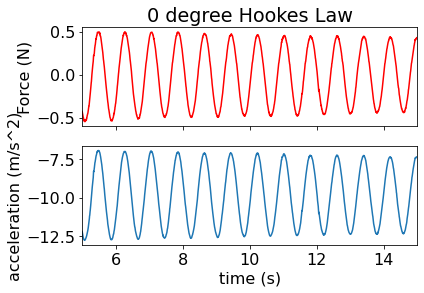

In [78]:
# Two subplots, the axes array is shared
# Choose the sensor for fitting.
f, axarr = plt.subplots(2, sharex=True)
plt.xlim(start_time, stop_time)
axarr[0].plot(time, force,'r')
axarr[0].set_title('0 degree Hookes Law')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time, accel)
axarr[1].set_xlabel('time (s)')
axarr[1].set_ylabel('acceleration (m/s^2)')
plt.show()


In [79]:
# Defines the various oscillator models that we fit to:

# Simple harmonic motion using acceleration
def simple_a(t, A, B, w, phi):                  # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B - A * (w**2) * np.cos(w*t + phi)   # output: acceleration

# Simple harmonic motion using position
def simple_y(t, A, B, w, phi):       # inputs: t:time, A:amplitude, B:offset, w:angular frequency, phi:phase
    return B + A*np.cos(w*t + phi)   # output: position

# Velocity-dependent friction using acceleration
def vdamped_a(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * ((beta**2-w**2)*np.cos(w*t + phi)+2*beta*w*np.sin(w*t+phi))   # output: acceleration

# Velocity-dependent friction using position
def vdamped_y(t, A, B, w, phi, beta):    # inputs: t:time, A:amplitude, B:offset, w:ang. frequency, phi:phase, beta:damping
    return B + A * np.exp(-beta*t) * np.cos(w*t + phi)        # output: position

Ainit, Binit, winit, phiinit, betainit=[0.1, -10, 7.5, 0.56, 0.4]


In [80]:
oscillator_model = simple_a

start_pars=[Ainit, Binit, winit, phiinit]
pars, cov = opt.curve_fit(oscillator_model, time, accel, p0=start_pars)

[A, B, w, phi] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))


[[ 4.29653903e-02  5.11812140e-05]
 [-9.84155365e+00  2.27171753e-03]
 [ 7.92747414e+00  4.16492787e-04]
 [-2.58635603e+00  4.34189602e-03]]


In [81]:
accel_pred = oscillator_model(time, A, B, w, phi)


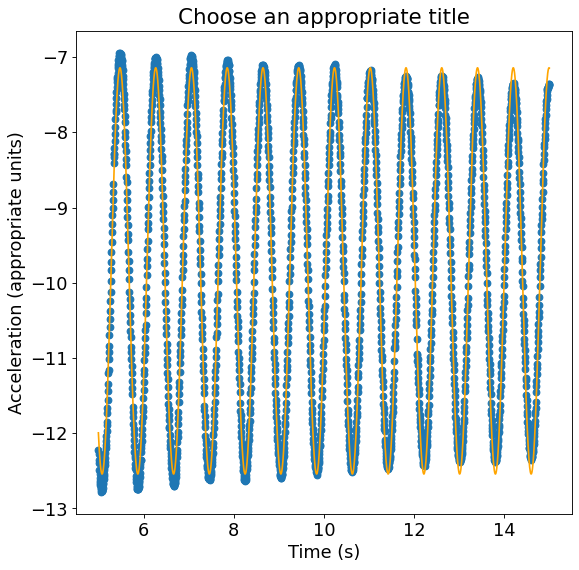

In [82]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.scatter(time, accel)
plt.plot(time, accel_pred, color='orange')

# Axes label and title
plt.title("Choose an appropriate title")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (appropriate units)")
plt.show()